In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [3]:
agri_data=pd.read_csv("C:/Users/LOQ/Documents/GUVI DS/Mini-Project/Project-Agri 02/Dataset/ICRISAT-District Level Data.csv")
agri_data.head()

,Dist Code,Year,State Code,State Name,Dist Name,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),...,SUGARCANE YIELD (Kg per ha),COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),FRUITS AREA (1000 ha),VEGETABLES AREA (1000 ha),FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha)
0,1,1966,14,Chhattisgarh,Durg,548.0,185.0,337.59,44.0,20.0,...,1777.78,0.0,0.0,0.0,5.95,6.64,12.59,0.01,0.60,0.47
1,1,1967,14,Chhattisgarh,Durg,547.0,409.0,747.71,50.0,26.0,...,1500.00,0.0,0.0,0.0,5.77,7.24,13.02,0.01,0.56,1.23
2,1,1968,14,Chhattisgarh,Durg,556.3,468.0,841.27,53.7,30.0,...,1000.00,0.0,0.0,0.0,5.41,7.40,12.81,0.10,0.58,1.02
3,1,1969,14,Chhattisgarh,Durg,563.4,400.8,711.40,49.4,26.5,...,1900.00,0.0,0.0,0.0,5.52,7.16,12.69,0.01,0.56,0.84
4,1,1970,14,Chhattisgarh,Durg,571.6,473.6,828.55,44.2,29.0,...,2000.00,0.0,0.0,0.0,5.45,7.19,12.64,0.02,0.52,0.42


In [6]:
agri_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16146 entries, 0 to 16145
Data columns (total 80 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Dist Code                                    16146 non-null  int64  
 1   Year                                         16146 non-null  int64  
 2   State Code                                   16146 non-null  int64  
 3   State Name                                   16146 non-null  object 
 4   Dist Name                                    16146 non-null  object 
 5   RICE AREA (1000 ha)                          16146 non-null  float64
 6   RICE PRODUCTION (1000 tons)                  16146 non-null  float64
 7   RICE YIELD (Kg per ha)                       16146 non-null  float64
 8   WHEAT AREA (1000 ha)                         16146 non-null  float64
 9   WHEAT PRODUCTION (1000 tons)                 16146 non-null  float64
 10

In [39]:
pd.set_option('display.max_row',None)
print(agri_data.isnull().sum())

Dist Code                                      0
Year                                           0
State Code                                     0
State Name                                     0
Dist Name                                      0
RICE AREA (1000 ha)                            0
RICE PRODUCTION (1000 tons)                    0
RICE YIELD (Kg per ha)                         0
WHEAT AREA (1000 ha)                           0
WHEAT PRODUCTION (1000 tons)                   0
WHEAT YIELD (Kg per ha)                        0
KHARIF SORGHUM AREA (1000 ha)                  0
KHARIF SORGHUM PRODUCTION (1000 tons)          0
KHARIF SORGHUM YIELD (Kg per ha)               0
RABI SORGHUM AREA (1000 ha)                    0
RABI SORGHUM PRODUCTION (1000 tons)            0
RABI SORGHUM YIELD (Kg per ha)                 0
SORGHUM AREA (1000 ha)                         0
SORGHUM PRODUCTION (1000 tons)                 0
SORGHUM YIELD (Kg per ha)                      0
PEARL MILLET AREA (1

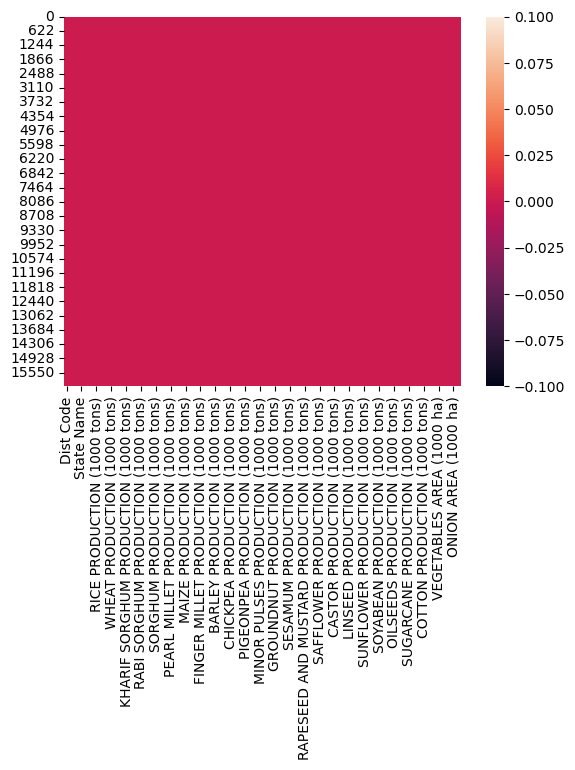

In [51]:
sns.heatmap(agri_data.isnull())
plt.show()

In [5]:
agri_data.duplicated().sum()

np.int64(0)

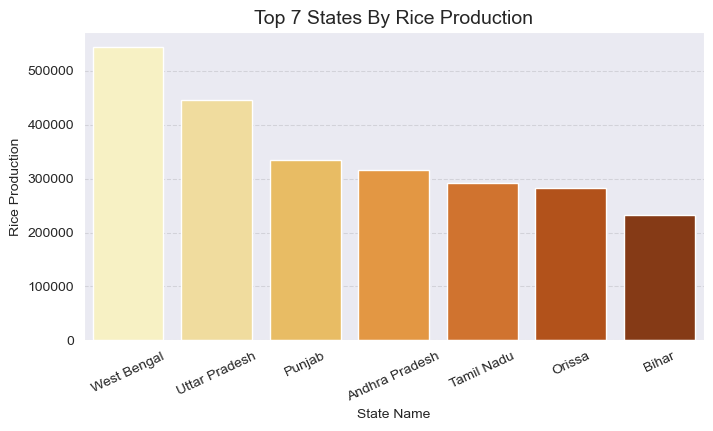

In [84]:
#Top 7 RICE PRODUCTION State Data(Bar_plot)

top_states=(agri_data.groupby("State Name")['RICE PRODUCTION (1000 tons)']
            .sum()
            .sort_values(ascending=False)
            .head(7)
            .reset_index())
top_states.columns = ['State Name', 'Rice Production']

plt.figure(figsize=(8,4))
sns.set_style('dark')
sns.barplot(data=top_states,x="State Name",y="Rice Production",palette="YlOrBr")
plt.title("Top 7 States By Rice Production",fontsize=14)
plt.xticks(rotation=25)
plt.grid(axis='y',linestyle='--',color='k',alpha=0.1)
plt.show()

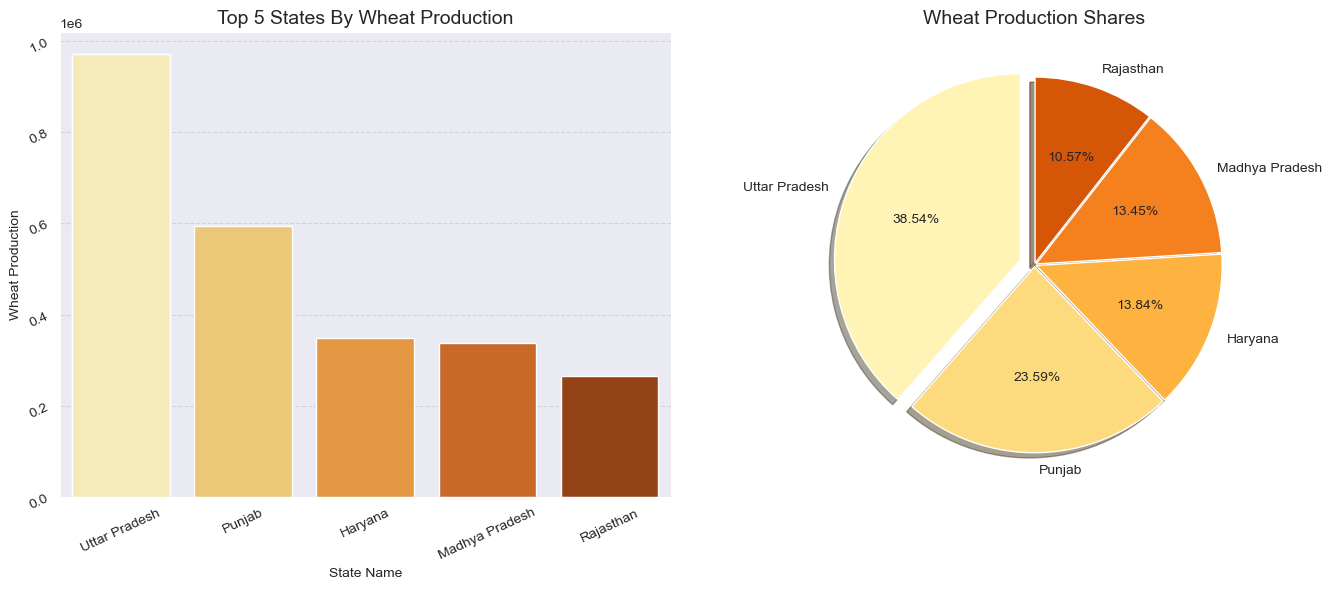

In [66]:
#Top 5 Wheat Producing States Data(Bar_chart)and its percentage(%)(Pie_chart)

top_States_w=(agri_data.groupby("State Name")['WHEAT PRODUCTION (1000 tons)']
              .sum()
              .sort_values(ascending=False)
              .head(5)
              .reset_index())
top_States_w.columns=["State Name","Wheat Production"]

sns.set_style('dark')
fig,axes=plt.subplots(1,2,figsize=(14,6))

sns.barplot(data=top_States_w,x="State Name",y="Wheat Production",palette="YlOrBr",ax=axes[0])
axes[0].set_title("Top 5 States By Wheat Production",fontsize=14)
axes[0].tick_params(rotation=25)
axes[0].grid(axis='y',linestyle='--',color='k',alpha=0.1)

axes[1].pie(top_States_w["Wheat Production"],
            labels=top_States_w["State Name"],
            autopct='%1.2f%%',
            colors=sns.color_palette("YlOrBr"),
            startangle=90,
            explode=(0.08,0.01,0.01,0.01,0.01),
            shadow=True)
axes[1].set_title("Wheat Production Shares",fontsize=14)
plt.tight_layout()
plt.show()

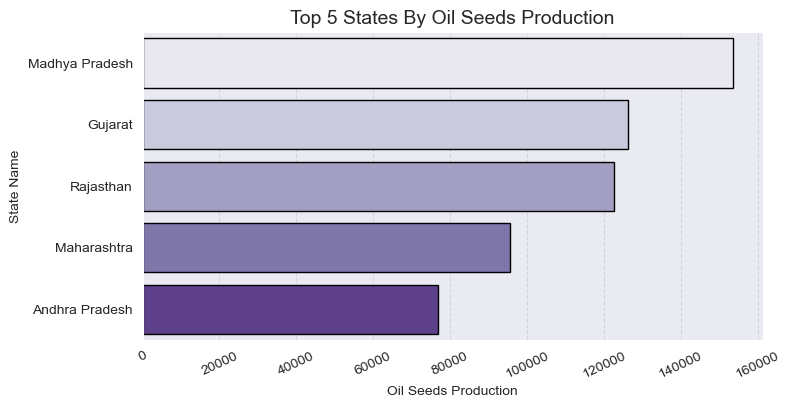

In [86]:
#Oil seed production by top 5 states

top_States_os=(agri_data.groupby("State Name")['OILSEEDS PRODUCTION (1000 tons)']
              .sum()
              .sort_values(ascending=False)
              .head(5)
              .reset_index())
top_States_os.columns=["State Name","Oil Seeds Production"]

plt.figure(figsize=(8,4))
sns.set_style('dark')
sns.barplot(data=top_States_os,y="State Name",x="Oil Seeds Production",palette="Purples",edgecolor='k')
plt.title("Top 5 States By Oil Seeds Production",fontsize=14)
plt.xticks(rotation=25)
plt.grid(axis='x',linestyle='--',color='k',alpha=0.1)
plt.show()

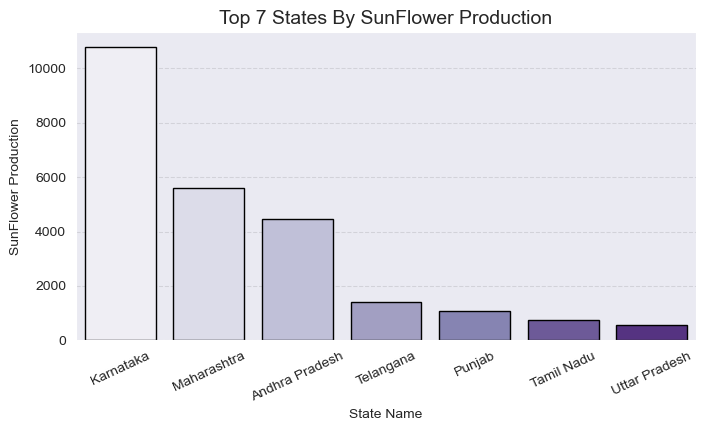

In [158]:
#Top 7 SUNFLOWER PRODUCTION  State

top_States_s=(agri_data.groupby("State Name")['SUNFLOWER PRODUCTION (1000 tons)']
              .sum()
              .sort_values(ascending=False)
              .head(7)
              .reset_index())
top_States_s.columns=["State Name","SunFlower Production"]

plt.figure(figsize=(8,4))
sns.set_style('dark')
sns.barplot(data=top_States_s,x="State Name",y="SunFlower Production",palette="Purples",edgecolor='k')
plt.title("Top 7 States By SunFlower Production",fontsize=14)
plt.xticks(rotation=25)
plt.grid(axis='y',linestyle='--',color='k',alpha=0.1)
plt.show()

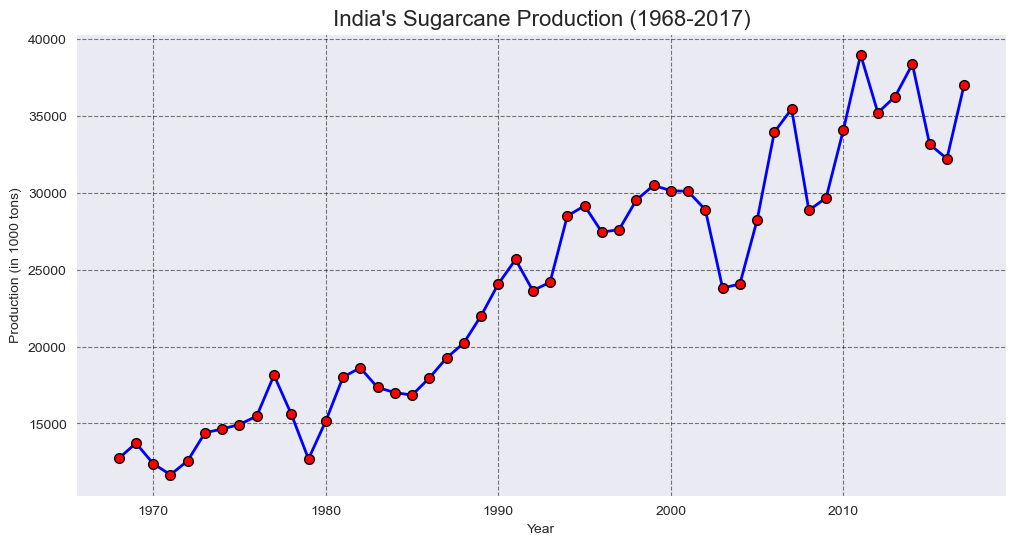

In [11]:
#India's SUGARCANE PRODUCTION From Last 50 Years(Line_plot)

sugar=(agri_data.groupby('Year')['SUGARCANE PRODUCTION (1000 tons)']
       .sum()
      .reset_index()
      .tail(50))
sugar.columns=['Years','Sugarcan Production']

plt.figure(figsize=(12,6))
plt.plot(sugar['Years'],sugar['Sugarcan Production'],marker='o',color="blue",linewidth=2,mec='k',mfc='r',ms=7)
plt.title("India's Sugarcane Production (1968-2017)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Production (in 1000 tons)")
plt.grid(True, linestyle='--', alpha=0.5,color='k')
#plt.tight_layout()
plt.show()


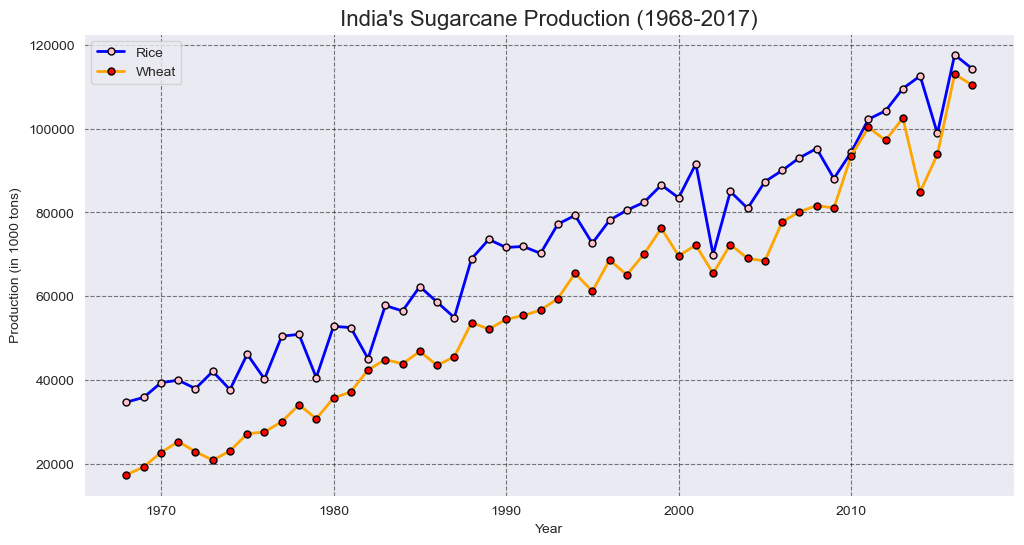

In [162]:
#Rice Production Vs Wheat Production (Last 50y)

rice=(agri_data.groupby('Year')['RICE PRODUCTION (1000 tons)']
       .sum()
      .reset_index()
      .tail(50))
rice.columns=['Years','Rice Production']

wheat=(agri_data.groupby('Year')['WHEAT PRODUCTION (1000 tons)']
       .sum()
      .reset_index()
      .tail(50))
wheat.columns=['Years','Wheat Production']

plt.figure(figsize=(12,6))
plt.plot(rice['Years'],rice['Rice Production'],marker='o',color="blue",linewidth=2,mec='k',mfc='pink',ms=5,label='Rice')
plt.plot(wheat['Years'],wheat['Wheat Production'],marker='o',color="orange",linewidth=2,mec='k',mfc='r',ms=5,label='Wheat')
plt.title("India's Rice vs Wheat Production (1968-2017)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Production (in 1000 tons)")
plt.grid(True, linestyle='--', alpha=0.5,color='k')
plt.legend()
plt.show()

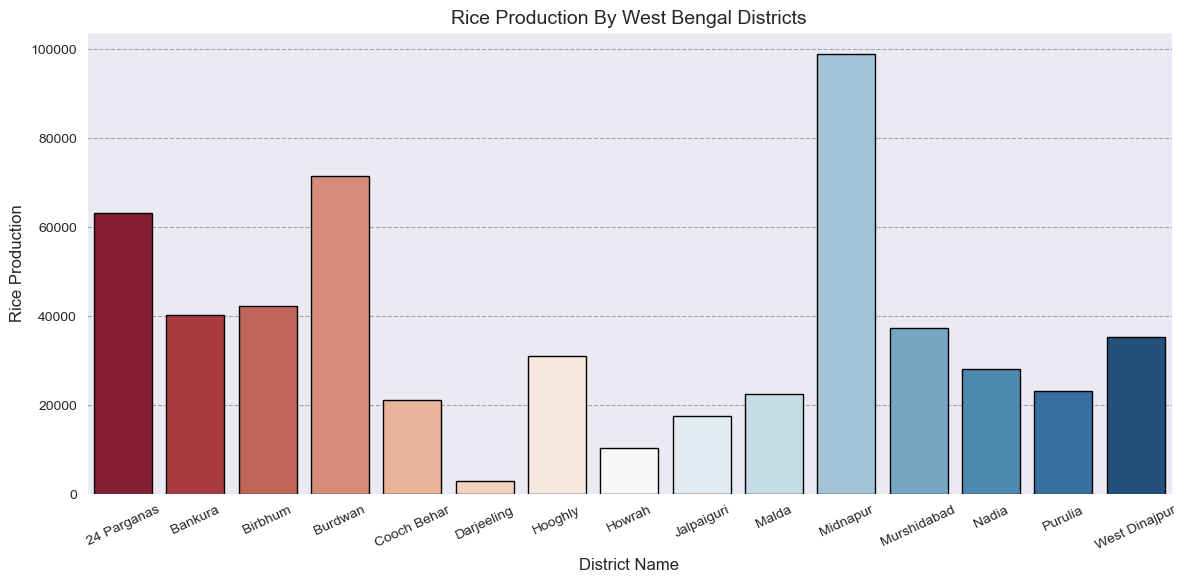

In [178]:
#Rice Production By West Bengal Districts

wb=agri_data[(agri_data['State Name']=='West Bengal')&(agri_data['RICE PRODUCTION (1000 tons)']>0)]
wb_d=(wb.groupby('Dist Name')['RICE PRODUCTION (1000 tons)']
      .sum()
      .reset_index())
wb_d.columns=['District Name','Rice Production']

plt.figure(figsize=(14,6))
sns.barplot(data=wb_d,x='District Name',y='Rice Production',palette="RdBu",edgecolor='k')
plt.title("Rice Production By West Bengal Districts",fontsize=14)
plt.xlabel("District Name", fontsize=12)  
plt.ylabel("Rice Production", fontsize=12)
plt.xticks(rotation=25)
plt.grid(axis='y',linestyle='--',color='k',alpha=0.3)
plt.show()

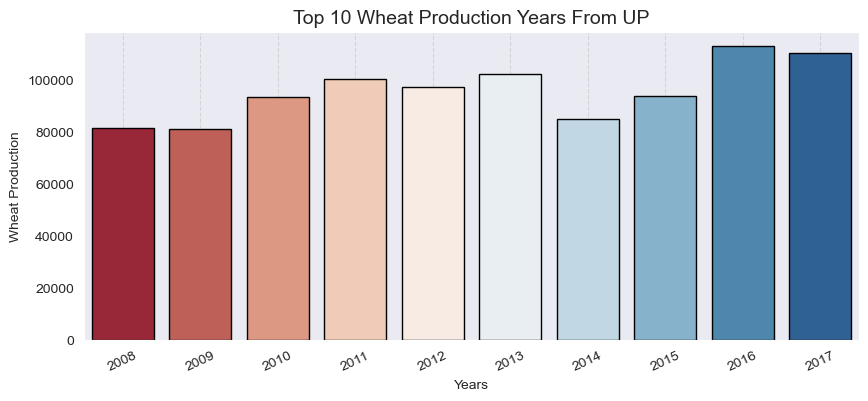

In [193]:
#Top 10 Wheat Production Years From UP

wp=(agri_data.groupby('Year')['WHEAT PRODUCTION (1000 tons)']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
    .head(10))
wp.columns=['Years','Wheat Production']

plt.figure(figsize=(10,4))
sns.barplot(data=wp,x="Years",y="Wheat Production",palette="RdBu",edgecolor='k')
plt.title("Top 10 Wheat Production Years From UP",fontsize=14)
plt.xticks(rotation=25)
plt.grid(axis='x',linestyle='--',color='k',alpha=0.1)
plt.show()

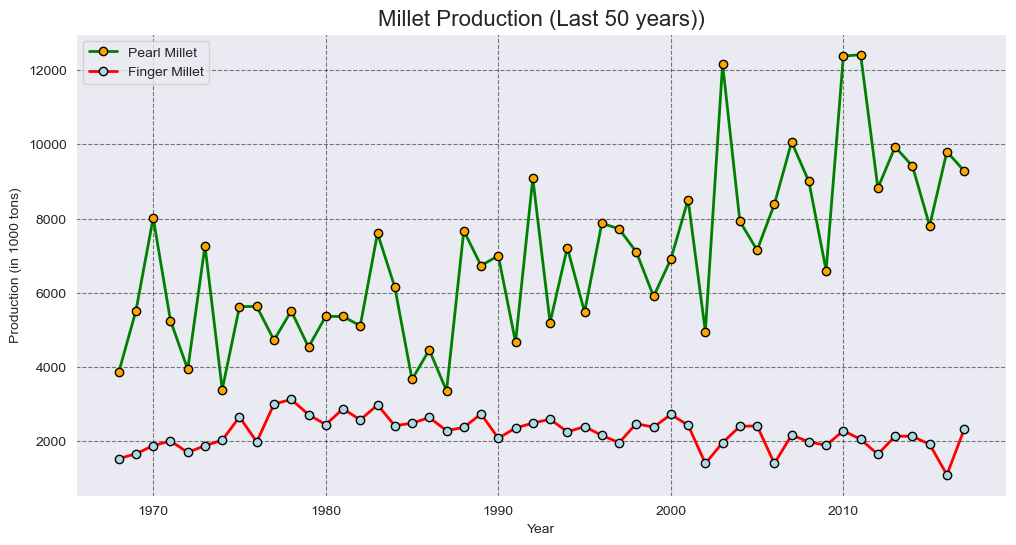

In [31]:
 #Millet Production (Last 50y)

millet_p=(agri_data.groupby('Year')['PEARL MILLET PRODUCTION (1000 tons)']
       .sum()
      .reset_index()
      .tail(50))
millet_p.columns=['Years','Pearl Millet Production']

millet_f=(agri_data.groupby('Year')['FINGER MILLET PRODUCTION (1000 tons)']
       .sum()
      .reset_index()
      .tail(50))
millet_f.columns=['Years','Finger Millet Production']

plt.figure(figsize=(12,6))
sns.set_style('dark')
plt.plot(millet_p['Years'],millet_p['Pearl Millet Production'],marker='o',color="g",linewidth=2,mec='k',mfc='orange',ms=6,label='Pearl Millet')
plt.plot(millet_f['Years'],millet_f['Finger Millet Production'],marker='o',color="r",linewidth=2,mec='k',mfc='lightblue',ms=6,label='Finger Millet')
plt.title("Millet Production (Last 50 years))", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Production (in 1000 tons)")
plt.grid(True, linestyle='--', alpha=0.5,color='k')
plt.legend(loc='upper left')
plt.show()


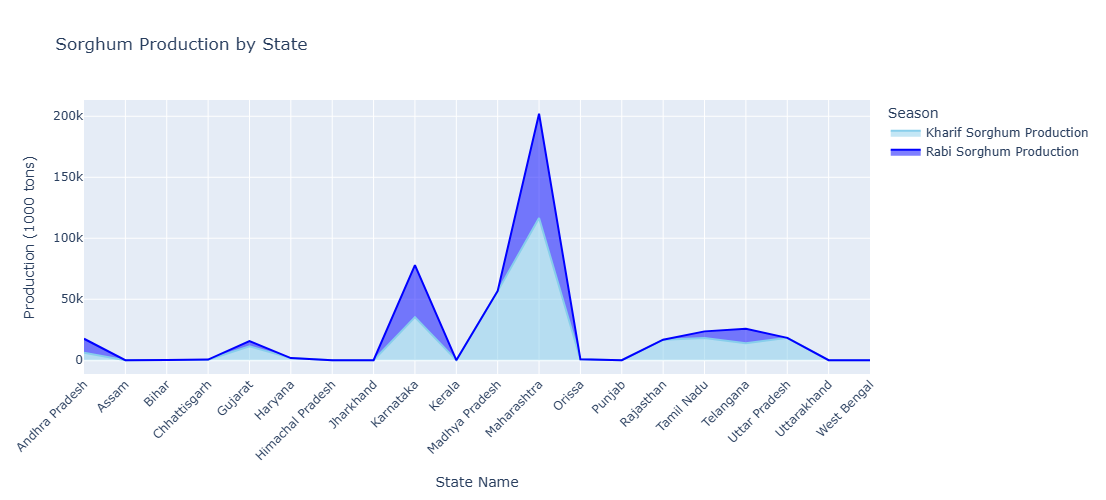

In [39]:
#Sorghum Production (Kharif and Rabi) by Region

k_sp=(agri_data.groupby('State Name')['KHARIF SORGHUM PRODUCTION (1000 tons)']
      .sum()
      .reset_index())
k_sp.columns=['State Name','Kharif Sorghum Production']

r_sp=(agri_data.groupby('State Name')['RABI SORGHUM PRODUCTION (1000 tons)']
      .sum()
      .reset_index())
r_sp.columns=['State Name','Rabi Sorghum Production']
merged_df = pd.merge(k_sp, r_sp)

fig = px.area(melted_df,
              x='State Name',
              y='Production (1000 tons)',
              color='Season',
              title='Sorghum Production by State',
              color_discrete_map={
                  'Kharif Sorghum Production': 'skyblue',
                  'Rabi Sorghum Production': 'blue'
              })

fig.update_layout(xaxis_tickangle=-45,width=1100,
    height=500)
fig.show()

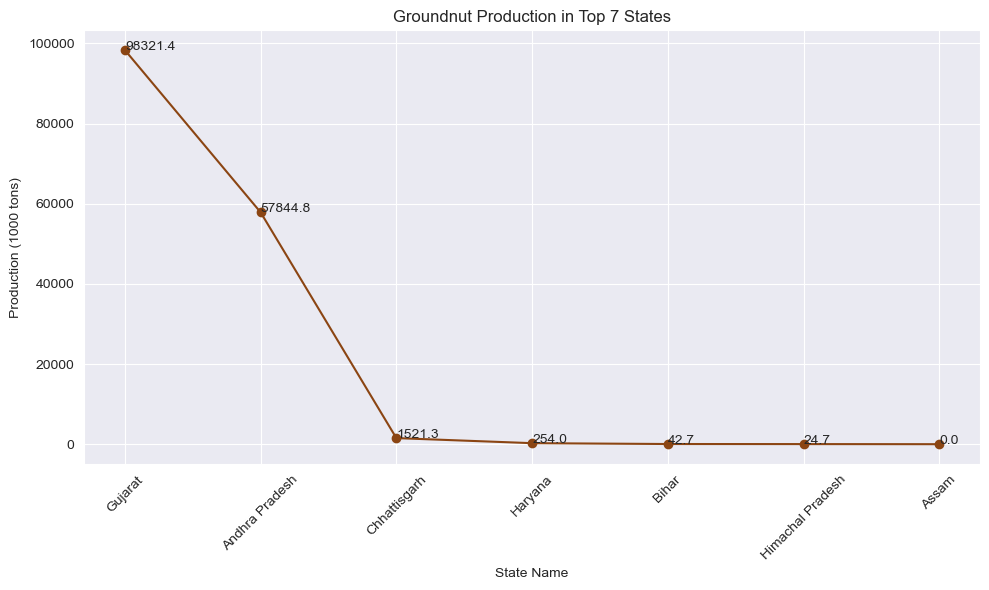

In [71]:
#Top 7 States for Groundnut Production

gp=(agri_data.groupby('State Name')['GROUNDNUT PRODUCTION (1000 tons)']
    .sum()
    .head(7)
    .sort_values(ascending=False)
    .reset_index())
gp.columns=['State Name','GroundNut Production']

plt.figure(figsize=(10, 6))
plt.plot(gp['State Name'], gp['GroundNut Production'], marker='o', linestyle='-', color='saddlebrown')
plt.title('Groundnut Production in Top 7 States')
plt.xlabel('State Name')
plt.ylabel('Production (1000 tons)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
for i, value in enumerate(gp['GroundNut Production']):
    plt.text(i, value + 5, f'{value:.1f}', ha='left')
plt.show()

In [56]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


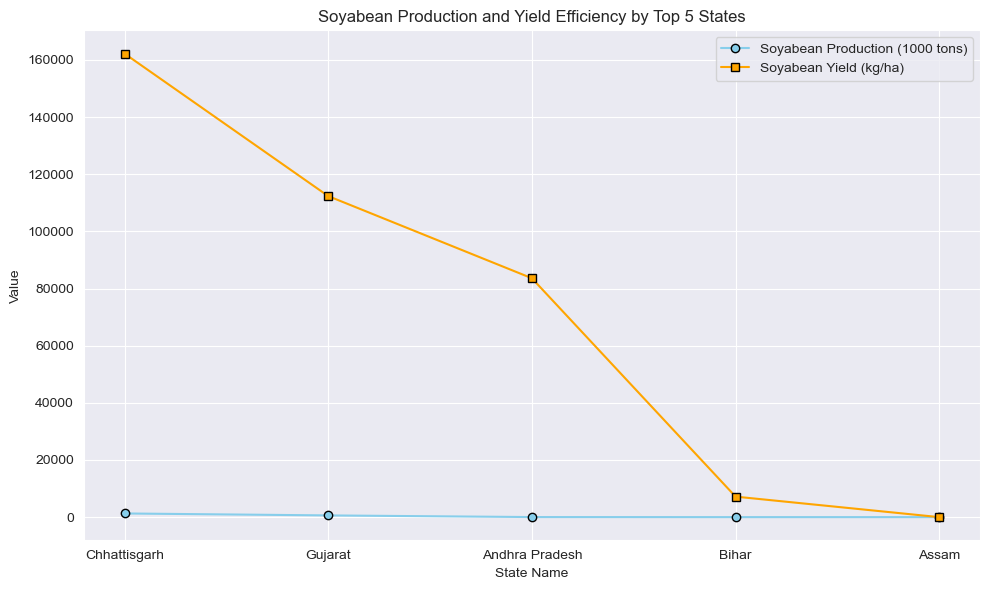

In [108]:
#Soybean Production by Top 5 States and Yield Efficiency

sp=(agri_data.groupby('State Name')['SOYABEAN PRODUCTION (1000 tons)']
    .sum()
    .head(5)
    .sort_values(ascending=False)
    .reset_index())
sp.columns=['State Name','Soyabean Production']
sy=(agri_data.groupby('State Name')['SOYABEAN YIELD (Kg per ha)']
    .sum()
    .head(5)
    .sort_values(ascending=False)
    .reset_index())
sy.columns=['State Name','Soyabean Yield']
merge=pd.merge(sp,sy)

plt.figure(figsize=(10, 6))

plt.plot(merge['State Name'], merge['Soyabean Production'], marker='o',mec='k', label='Soyabean Production (1000 tons)', color='skyblue')
plt.plot(merge['State Name'],merge['Soyabean Yield'], marker='s',mec='k', label='Soyabean Yield (kg/ha)', color='orange')
plt.title('Soyabean Production and Yield Efficiency by Top 5 States')
plt.xlabel('State Name')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


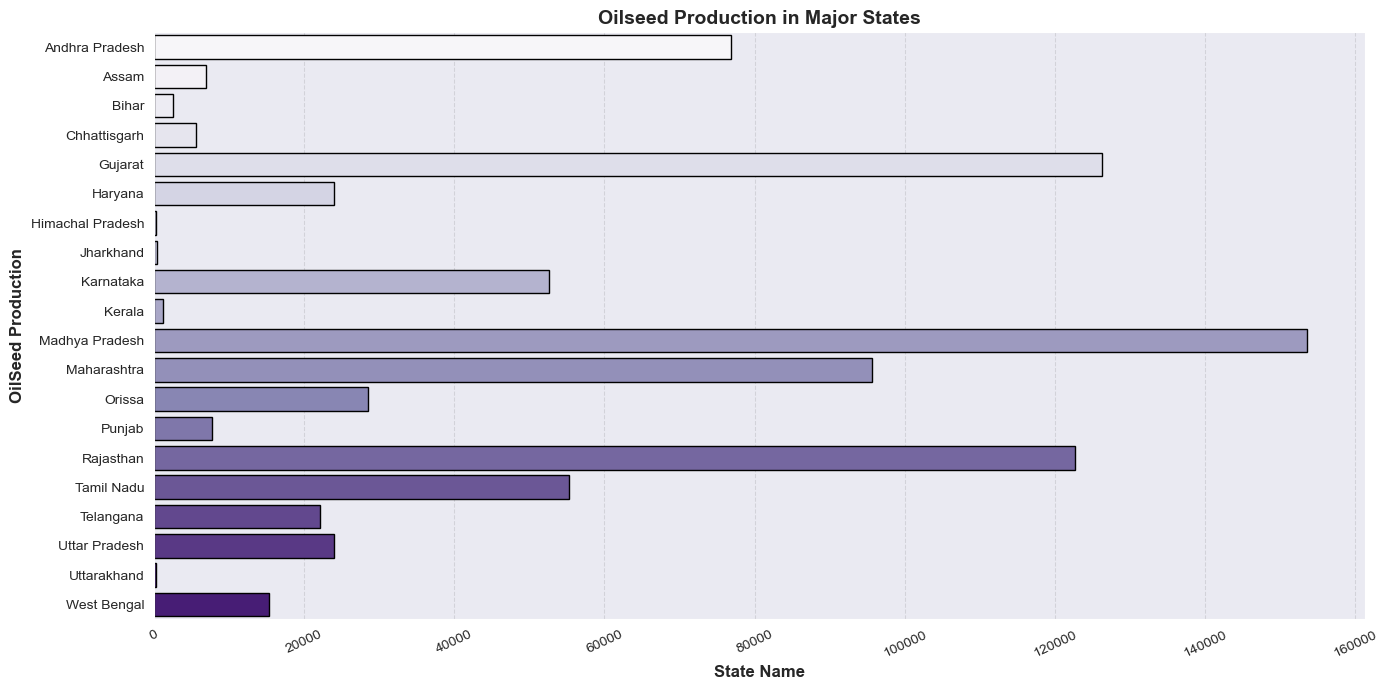

In [125]:
#Oilseed Production in Major States

states=(agri_data.groupby('State Name')['OILSEEDS PRODUCTION (1000 tons)']
        .sum()
        .reset_index())
states.columns=['State Name','OilSeed Production']

plt.figure(figsize=(14,7))
sns.set_style('dark')
bars=sns.barplot(data=states,y="State Name",x="OilSeed Production",palette="Purples",edgecolor='k')
plt.xlabel("State Name", fontsize=12, fontweight='bold')
plt.ylabel("OilSeed Production", fontsize=12, fontweight='bold')
plt.title("Oilseed Production in Major States",fontsize=14,fontweight='bold')
plt.xticks(rotation=25)
plt.grid(axis='x',linestyle='--',color='k',alpha=0.1)
plt.tight_layout()
plt.show()

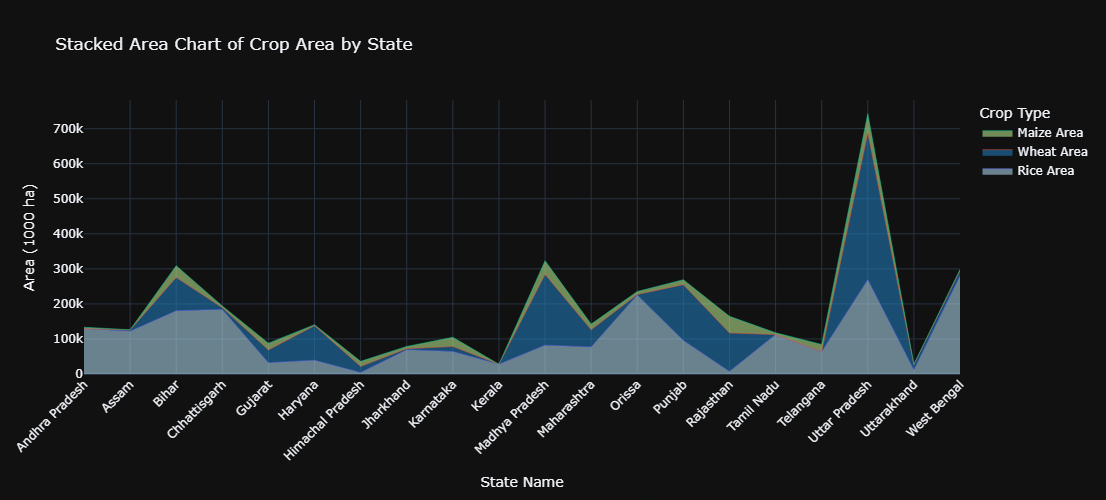

In [178]:
#Impact of Area Cultivated on Production (Rice, Wheat, Maize)

area=(agri_data.groupby("State Name").agg({'RICE AREA (1000 ha)':'sum',
                                           'WHEAT AREA (1000 ha)':'sum',
                                           'MAIZE AREA (1000 ha)':'sum'}).reset_index())
area.columns=['State Name','Rice Area','Wheat Area','Maize Area']

import plotly.graph_objects as go

# Data
states = area['State Name']
rice = area['Rice Area']
wheat = area['Wheat Area']
maize = area['Maize Area']

# Create figure
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=states, y=rice,
    mode='lines',
    stackgroup='one',
    name='Rice Area',
    line=dict(width=0.5),
    fillcolor='rgba(166,206,227,0.6)'
))

fig.add_trace(go.Scatter(
    x=states, y=wheat,
    mode='lines',
    stackgroup='one',
    name='Wheat Area',
    line=dict(width=0.5),
    fillcolor='rgba(31,120,180,0.6)'
))

fig.add_trace(go.Scatter(
    x=states, y=maize,
    mode='lines',
    stackgroup='one',
    name='Maize Area',
    line=dict(width=0.5),
    fillcolor='rgba(178,223,138,0.6)'
))

# Layout
fig.update_layout(
    title='Stacked Area Chart of Crop Area by State',
    xaxis_title='State Name',
    yaxis_title='Area (1000 ha)',
    font=dict(size=12),
    legend_title='Crop Type',
    xaxis=dict(tickangle=-45),
    template='plotly_dark',
    height=500
)

fig.show()

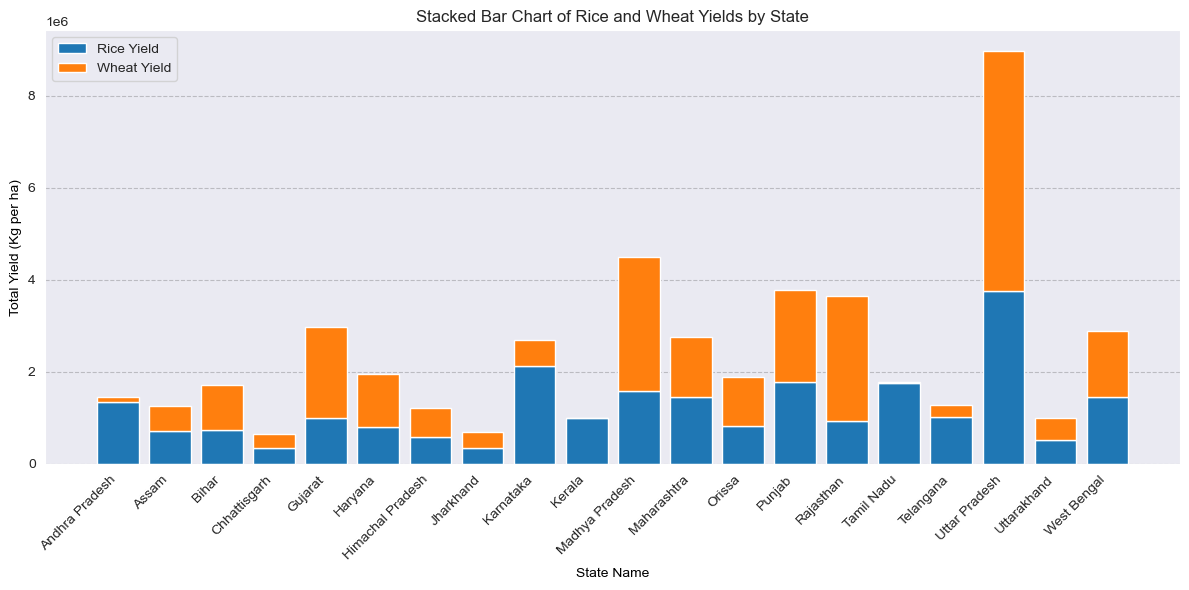

In [48]:
#Rice vs. Wheat Yield Across States

yield_pro=(agri_data.groupby('State Name').agg({'RICE YIELD (Kg per ha)':'sum',
                                                'WHEAT YIELD (Kg per ha)':'sum'}).reset_index())
yield_pro.columns=['State Name','Rice Yield','Wheat Yield']
sns.set_style('dark')
plt.figure(figsize=(12, 6))
plt.bar(yield_pro['State Name'], yield_pro['Rice Yield'], label='Rice Yield')
plt.bar(yield_pro['State Name'], yield_pro['Wheat Yield'], bottom=yield_pro['Rice Yield'], label='Wheat Yield')
plt.xlabel('State Name',color='k')
plt.ylabel('Total Yield (Kg per ha)',color='k')
plt.title('Stacked Bar Chart of Rice and Wheat Yields by State')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper left')
plt.grid(axis='y', linestyle='--', color='k', alpha=0.2)
plt.tight_layout()
plt.show()